In [168]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
from time import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['GORDON_REPO_DIR'], 'utilities'))
from utilities2015 import *

from matplotlib.path import Path
%matplotlib inline

import scipy.ndimage as nd
import scipy

from skimage.feature import hog
from skimage import data, color, exposure
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import confusion_matrix

import random

In [150]:
X = np.load('/oasis/projects/nsf/csd395/ruogu/svm/X.npy');
y = np.load('/oasis/projects/nsf/csd395/ruogu/svm/y.npy');

In [151]:
print "%s" %(X.shape,);
print "%s" %(y.shape,);

(28571, 4200)
(28571,)


In [152]:
raw_data = zip(X, y);
print type(raw_data);

<type 'list'>


In [153]:
data = [];
for i in range(0, 10):
    data_for_class = [x for x in raw_data if x[1] == i];
    data = data + random.sample(data_for_class, 100);
# data is a list of (ndarray, int)
random.shuffle(data);

In [156]:
quota = 0.75;
n_training = int(len(data) * quota);
n_testing = len(data) - n_training;

In [157]:
training_data = data[:n_training];
testing_data = data[n_training:];

In [158]:
training_X = np.asarray([x[0] for x in training_data]);
training_y = np.asarray([x[1] for x in training_data]);
testing_X = np.asarray([x[0] for x in testing_data]);
testing_y = np.asarray([x[1] for x in testing_data]);

In [159]:
print "Shape of training data: %s" %(training_X.shape,);
print "Shape of training label: %s" %(training_y.shape,);
print "Shape of testing data: %s" %(testing_X.shape,);
print "Shape of testing label: %s" %(testing_y.shape,);

Shape of training data: (750, 4200)
Shape of training label: (750,)
Shape of testing data: (250, 4200)
Shape of testing label: (250,)


In [171]:
# Calculate histogram intersection kernel
myKernel = np.zeros(shape=(n_training, n_training));
for i in range(0, n_training):
    for j in range(0, n_training):
        myKernel[i][j] = sum(np.minimum(training_X[i], training_X[j]));

In [172]:
print "kernel shape: %s" %(myKernel.shape,);

kernel shape: (750, 750)


In [173]:
# Train SVM
clf = svm.SVC(kernel="precomputed");
clf.fit(myKernel, training_y);

In [174]:
# Training accuracy
predict_labels_train = clf.predict(myKernel);
n_correct_train = 0;
for i in range(len(training_data)):
    if predict_labels_train[i] == training_y[i]:
        n_correct_train += 1;
print "Training accuracy: {}".format(1.0*n_correct_train / len(training_data));

Training accuracy: 0.761333333333


In [175]:
cm_train = confusion_matrix(training_y, predict_labels_train);

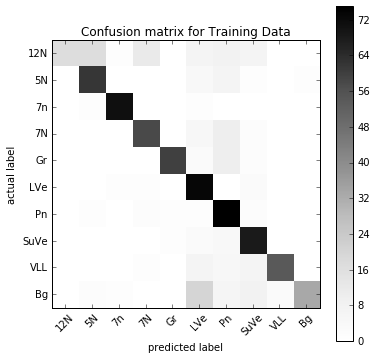

In [178]:
plt.figure(figsize=(6, 6));
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Greys);
plt.ylabel('actual label');
plt.xlabel('predicted label')
plt.title('Confusion matrix for Training Data');
plt.colorbar();
classes = ['12N', '5N', '7n', '7N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL', 'Bg'];
tick_marks = np.arange(len(classes));
plt.xticks(tick_marks, classes, rotation=45);
plt.yticks(tick_marks, classes);

In [180]:
# Test
testKernel = np.zeros(shape=(n_testing, n_training));
for i in range(0, n_testing):
    for j in range(0, n_training):
        testKernel[i][j] = sum(np.minimum(testing_X[i], training_X[j]));

In [181]:
predict_labels_test = clf.predict(testKernel);
n_correct_test = 0;
for i in range(0, n_testing):
    if (predict_labels_test[i] == testing_y[i]):
        n_correct_test += 1;
print "Test accuracy: {}".format(1.0*n_correct_test / n_testing);

Test accuracy: 0.364


In [182]:
cm_test = confusion_matrix(testing_y, predict_labels_test);

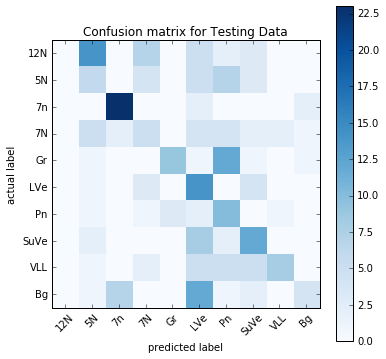

In [183]:
plt.figure(figsize=(6, 6));
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues);
plt.ylabel('actual label');
plt.xlabel('predicted label')
plt.title('Confusion matrix for Testing Data');
plt.colorbar();
classes = ['12N', '5N', '7n', '7N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL', 'Bg'];
tick_marks = np.arange(len(classes));
plt.xticks(tick_marks, classes, rotation=45);
plt.yticks(tick_marks, classes);